<a href="https://colab.research.google.com/github/ArquimedesG/Machine_Learning_Colabs/blob/main/ML_S6_KNN_18JL23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






# Nearest Neighbors Methods


The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these.

 The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning).

 The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice.

 Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree).

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits and satellite image scenes.

Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.


# K-Nearest Neighbors (KNN)

"Show me who your friends are and I’ll tell you who you are?"

The concept of the k-nearest neighbor classifier can hardly be simpler described.

The principle behind nearest neighbor classification consists in finding a predefined number, i.e. the 'k' - of training samples closest in distance to a new sample, which has to be classified.

The label of the new sample will be defined from these neighbors. k-nearest neighbor classifiers have a fixed user defined constant for the number of neighbors which have to be determined.

The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice.

Neighbors-based methods are known as non-generalizing machine learning methods, since they simply "remember" all of its training data.

Classification can be computed by a majority vote of the nearest neighbors of the unknown sample.



The following picture shows in a simple way how the nearest neighbor classifier works.

The puzzle piece is unknown.

To find out which animal it might be we have to find the neighbors.

If k=1, the only neighbor is a cat and we assume in this case that the puzzle piece should be a cat as well.

If k=4, the nearest neighbors contain one chicken and three cats. In this case again, it will be save to assume that our object in question should be a cat.

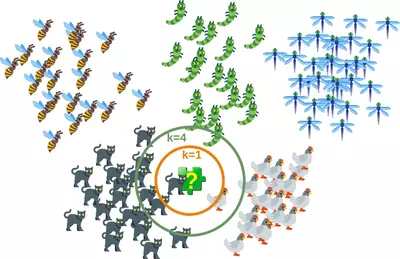

 KNN classifier models work in 3 broad steps to predict labels for unprecedented feature values (which are not in the training data).

    It memorizes the whole training test set — specifically which features resulted in which y label.

    It defines the K-nearest most similar instances, where K is a user defined integer.
    For a given data point, it looks at the nearest features and their respective labels.
    
    It predicts the new label as a function of nearest neighbors’ labels. Usually, this is a majority vote.

KNN regressions: the difference is that KNN regression models works to predict new values from a continuous distribution for unprecedented feature values.

 Conceptually, how it arrives at a the predicted values is similar to KNN classification models, except that it will take the average value of it’s K-nearest neighbors.

# sklearn.neighbors Module

‘sklearn.neighbors‘ module provides unsupervised and supervised neighbors-based learning methods. Among these are classification and regression tools.

 Specifically, there are three classes that implement supervised classification algorithm based on nearest neighbor approach, namely:

    KNeighborsClassifier

    RadiusNeighborsClassifier

    NearestCentroid classifier

 **KNeighborsClassifier** implements classification based on voting by nearest k-neighbors of target point, t, while **RadiusNeighborsClassifier** implements classification based on all neighborhood points within a fixed radius, r, of target point, t.

 In **NearestCentroid classifier**, each class is represented by the centroid of its members; thus the target point will be member of that class whose centroid is nearest to it.

 NearestCentroid algorithm is the simplest of the three and has no parameters to select from.

 Its results can be taken as the benchmark for evaluation purposes.

#KNeighborsClassifier

*KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, metric=’minkowski’, p=2, metric_params=None)*

‘n_neighbors‘ are the number of neighbors that will vote for the class of the target point; default number is 5. An odd number is preferred to avoid any tie.

 ‘weights‘ parameter has two choices: ‘uniform‘ and ‘distance‘.
 For the ‘uniform‘ weight, each of the k neighbors has equal vote whatever its distance from the target point.
 If the weight is ‘distance‘ then voting weightage or importance varies by inverse of distance; those points who are nearest to the target point have greater influence than those who are farther away.

 Parameter ‘algorithm‘ is for selecting the indexing data structure that will be used for speeding up neighborhood search; value of ‘auto‘ leaves it to algorithm to make the best choice among the three.

 Parameter ‘leaf_size‘ is the size of leaf in kd_tree or ball_tree.
 Larger the size, greater the speed of initial indexing structure formation but at the cost of delay in classification of target point.

 Parameter ‘metric‘ decides how distances are calculated in space.
 One familiar way is euclidean distance but then in some cases other measures of distances such as Manhattan distance are also used.
 A general formulation of distance metric is ‘minkowski’ distance.
 When parameter ‘p‘ is 2, it is the same as euclidean distance and when parameter ‘p‘ is 1, it is Manhattan distance.  

 Last parameter ‘metric_params‘ is to provide any additional arguments to metric function.


In [ ]:
#  Importing Numpy, Pandas and Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing train_test_split to manage data (divide in train and test sets)
from sklearn.model_selection import train_test_split

# Importing KNeighborsClassifier (KNN) from sklearn.neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Importing confusion_matrix, classification_report and accuracy_score from sklearn.metrics module
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Fake Bills Dataset (Kaggle)

A dataset with 1500 bills measurement to try to predict fake bills

The dataset includes 1500 rows and 7 columns:

    is_genuine: boolean

    diagonal: float

    height_left: float

    height_right: float

    margin_low: float

    margin_upper: float

    length: float

In [ ]:
# Reading FakeBills csv file to a DataFrame
bills = pd.read_csv("fake_bills.csv", delimiter=";")
#bills = pd.read_csv("https://gist.githubusercontent.com/javierIA/52184893d57d9a644e2362ee108cfa9e/raw/7297193ea28a0ebed89cb230034a0e62043fe288/bills.csv")

In [ ]:
# Printing DataFrame to confirm it loaded properly
bills

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
# Printing size of the dataframe
bills.shape


(1500, 7)

In [ ]:
# Printing first lines of the dataframe
bills.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
# Dropping all rows with NANs and resetting index for the rows
bills_clean=bills.dropna().reset_index(drop=True)
bills_clean

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1458,0,171.75,104.38,104.17,4.42,3.09,111.28
1459,0,172.19,104.63,104.44,5.27,3.37,110.97
1460,0,171.80,104.01,104.12,5.51,3.36,111.95
1461,0,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
#  Creating a dictionary of replacements for True and False booleans by 1 and 0
zero_one={
    True:1,
    False:0
}
# Replacing values in column "is_genuine" to 0 and 1
bills_clean['is_genuine'].replace(zero_one, inplace=True)
bills_clean

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1458,0,171.75,104.38,104.17,4.42,3.09,111.28
1459,0,172.19,104.63,104.44,5.27,3.37,110.97
1460,0,171.80,104.01,104.12,5.51,3.36,111.95
1461,0,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
# Eliminating column "is_genuine" to create the input dataframe x
x = np.array(bills_clean.drop(["is_genuine"], axis=1))
#, "Unnamed: 0"
#Printing input dataframe
x

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       ...,
       [171.8 , 104.01, 104.12,   5.51,   3.36, 111.95],
       [172.06, 104.28, 104.06,   5.17,   3.46, 112.25],
       [171.47, 104.15, 103.82,   4.63,   3.37, 112.07]])

In [ ]:
# Assigning column "is_genuine" to the output array y
y = np.array(bills_clean["is_genuine"])
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Splitting the x and y dataframes into test and train arrays
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
# Printing x_train dataset content
print(x_train)
x_train.shape

[[172.1  104.17 103.78   4.61   2.84 113.35]
 [171.5  104.11 104.14   5.38   3.53 111.24]
 [171.64 103.9  104.07   3.6    3.39 113.18]
 ...
 [171.55 103.92 103.77   4.12   3.25 113.19]
 [171.55 103.35 103.69   4.31   3.19 113.42]
 [171.92 104.12 104.15   3.83   2.88 112.65]]


(1024, 6)

In [ ]:
# Printing x_train dataset content
print(y_train)
y_train.shape

[1 0 1 ... 1 1 1]


(1024,)

# Defining 3 neighbors (k=3)

In [ ]:
#  Defining a classifier clf of type KNeighborsClassifier with k=3
#  and using training files x_train and y_train
clf=KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
clf

KNeighborsClassifier(n_neighbors=3)

Calculating Score with Training Data

> model.score automates the prediction of your data using X_test and compares it with Y_test and by default uses the R-squared metric to so

model.score() : for classification or regression problems, most estimators implement a score method.
Scores are between 0 and 1, with a larger score indicating a better fit..



In [ ]:
# Using .score estimator to get the accuracy of the model using train datasets
clf.score(x_train, y_train)

0.9931640625

Calculating Score with Test Data

In [ ]:
# Using .score estimator to get the accuracy of the model using test datasets
clf.score(x_test, y_test)

0.9931662870159453

In [ ]:
# Using the predict method to estimate the y outputs based on the x_test dataset
y_predict_test=clf.predict(x_test)
y_predict_test

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
data=np.array([141,414, 414,442,423,4242]).reshape(1,-1)
data
clf.predict(data)

array([1])

In [ ]:
# Providing a report of the comparison between predicted and real values
cr=classification_report(y_test, y_predict_test)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       147
           1       0.99      1.00      0.99       292

    accuracy                           0.99       439
   macro avg       0.99      0.99      0.99       439
weighted avg       0.99      0.99      0.99       439



# Using Seaborn to Plot

In [ ]:
# Importing seaborn
import seaborn as sns

Calculating Confusion Matrix

In [ ]:
# Determining confusion matrix values based on real and predicted values
cm=confusion_matrix(y_test, y_predict_test)
cm

array([[145,   2],
       [  1, 291]])

Text(0.5, 1.0, 'Confusion Matrix')

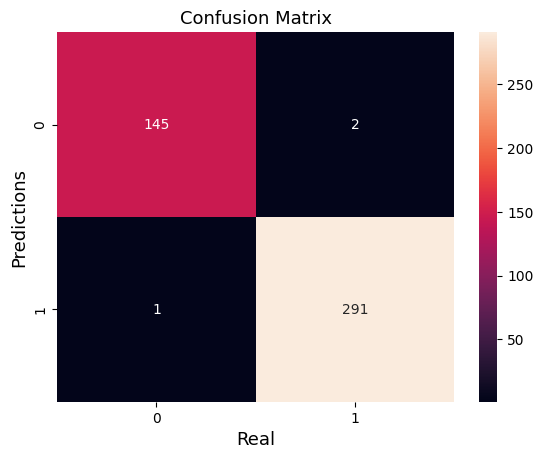

In [ ]:
# Creating a Heat map with Confusion Matrix data
sns.heatmap(cm, annot=True, fmt="g")
plt.ylabel('Predictions', fontsize=13)
plt.xlabel('Real', fontsize=13)
plt.title('Confusion Matrix', fontsize=13)

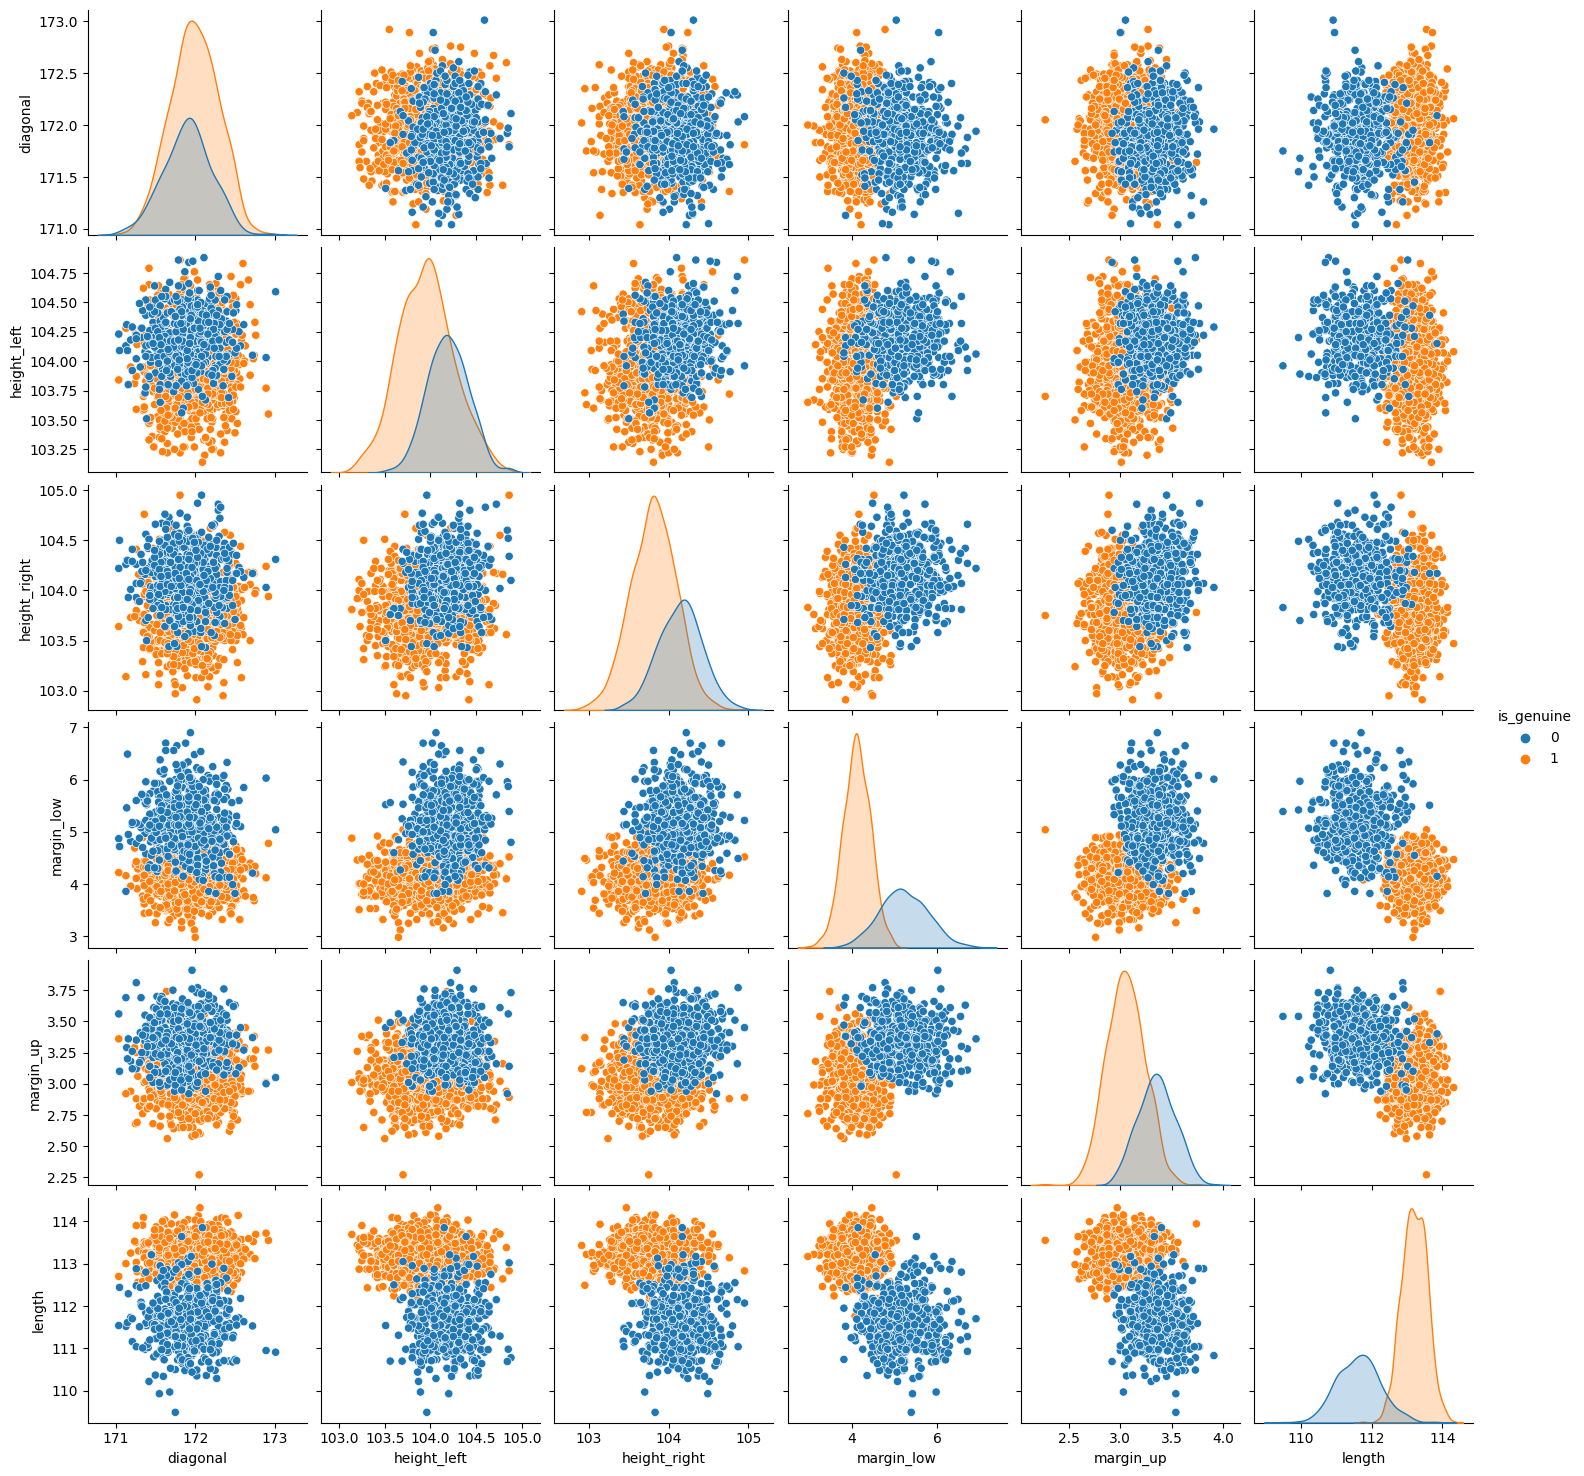

In [ ]:
# Plotting pairs of data from dataframe using output "is_genuine" to differentiate sets
sns.pairplot(bills_clean, hue="is_genuine")
plt.show()

# Defining 10 neighbors

In [ ]:
clf=KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train)

In [ ]:
clf.score(x_train, y_train)

0.9914285714285714

In [ ]:
clf.score(x_test, y_test)

0.9911111111111112